In [1]:
import os

In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install tensorflow --user


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
labeled_dataset_folder = '../labeled_dataset'  # Folder containing labeled images
categories = ['Vegetative', 'Flowering','Immature','Mature-HarvestReady']


In [9]:
def load_data():
    data = []
    labels = []
    for idx, category in enumerate(categories):
        category_path = os.path.join(labeled_dataset_folder, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(512, 512))
                img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize pixel values
                data.append(img_array)
                labels.append(idx)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")

    return np.array(data), np.array(labels)


In [10]:
data, labels = load_data()

In [11]:
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (85, 512, 512, 3)
Labels shape: (85,)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [13]:
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator()

In [14]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(categories), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
model = build_model()

C:\Users\sheno\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 253, 253, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,073,988 (240.61 MB)

 Trainable params: 63,073,988 (240.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=val_datagen.flow(X_val, y_val),
                    epochs=30)

C:\Users\sheno\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2534 - loss: 7.7327 - val_accuracy: 0.2941 - val_loss: 9.7698
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.2868 - loss: 7.4618 - val_accuracy: 0.5294 - val_loss: 1.1532
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.5053 - loss: 1.3263 - val_accuracy: 0.7059 - val_loss: 0.9549
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5641 - loss: 0.9772 - val_accuracy: 0.7647 - val_loss: 0.7762
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6551 - loss: 0.8484 - val_accuracy: 0.6471 - val_loss: 1.0405
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5733 - loss: 1.0621 - val_accuracy: 0.6471 - val_loss: 0.6881
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7227 - loss: 0.7483 - val_accuracy: 0.5882 - val_loss: 0.9234
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6629 - loss: 0.7751 - val_accuracy: 0.5294 - val_loss: 0.8406
Epoch 9/30
3/

In [18]:
model.save('../models/tomato_growth_stage_cnn.h5')

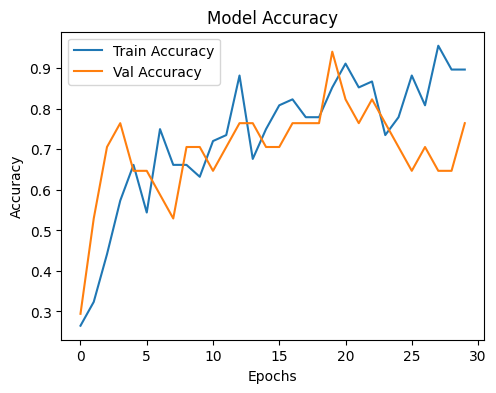

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

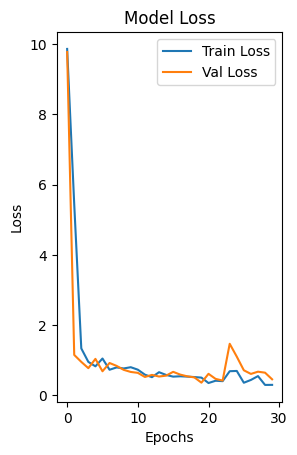

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [21]:
plt.show()